In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import tqdm

In [2]:
taxons_df = pd.read_csv("data/taxons.csv.gz")
taxons_df = taxons_df.set_index("id")

In [3]:
taxons_df.head()

,author_string,canonical_name,external_id,hierarchy_string,name_1,name_2,name_3,tsn,valid
id,,,,,,,,,
917853529,NaN,Plantae,NaN,202422,Plantae,NaN,NaN,202422,True
1189871018,"(Guérin-Méneville, 1845)",Exaerete frontalis,NaN,202423-914154-914155-914158-82696-563886-99208...,Exaerete,frontalis,NaN,763512,True
974,"Lahille, 1887",Cionidae,NaN,16762-261312088-261312089-817-261307138-818-81...,Cionidae,NaN,NaN,159111,True
1165,NaN,Dicarpa,NaN,16762-261312088-261312089-817-261307138-818-10...,Dicarpa,NaN,NaN,159430,True
1483,"Gill, 1862",Parascyllium,NaN,16762-261312088-261312089-817-18489-261312092-...,Parascyllium,NaN,NaN,159959,True


In [4]:
print("There is %d species in taxon database" % len(taxons_df))

There is 78768 species in taxon database


In [5]:
# Get data for polar bear

polarbear_df = taxons_df[taxons_df["canonical_name"] == "Ursus maritimus"]
polarbear_df

,author_string,canonical_name,external_id,hierarchy_string,name_1,name_2,name_3,tsn,valid
id,,,,,,,,,
16133,"Phipps, 1774",Ursus maritimus,NaN,16762-261312088-261312089-817-18489-261312092-...,Ursus,maritimus,NaN,180542,True


In [6]:
polarbear_hierarchical_string = polarbear_df.loc[16133, "hierarchy_string"]

print("Hierarchical string for polar bear is: %s" % polarbear_hierarchical_string)

Hierarchical string for polar bear is: 16762-261312088-261312089-817-18489-261312092-261312094-15550-15553-15561-16130-19810-16131-16132-16133


In [7]:
# Lets convert it to the names
def get_name_from_id(id):
    return taxons_df.loc[int(id), "canonical_name"]

print("Taxonomy hierarchy for polar bear:", list(map(get_name_from_id, polarbear_hierarchical_string.split("-"))))

Taxonomy hierarchy for polar bear: ['Animalia', 'Bilateria', 'Deuterostomia', 'Chordata', 'Vertebrata', 'Gnathostomata', 'Tetrapoda', 'Mammalia', 'Theria', 'Eutheria', 'Carnivora', 'Caniformia', 'Ursidae', 'Ursus', 'Ursus maritimus']


## Phylogenetic tree of animals with tracking data

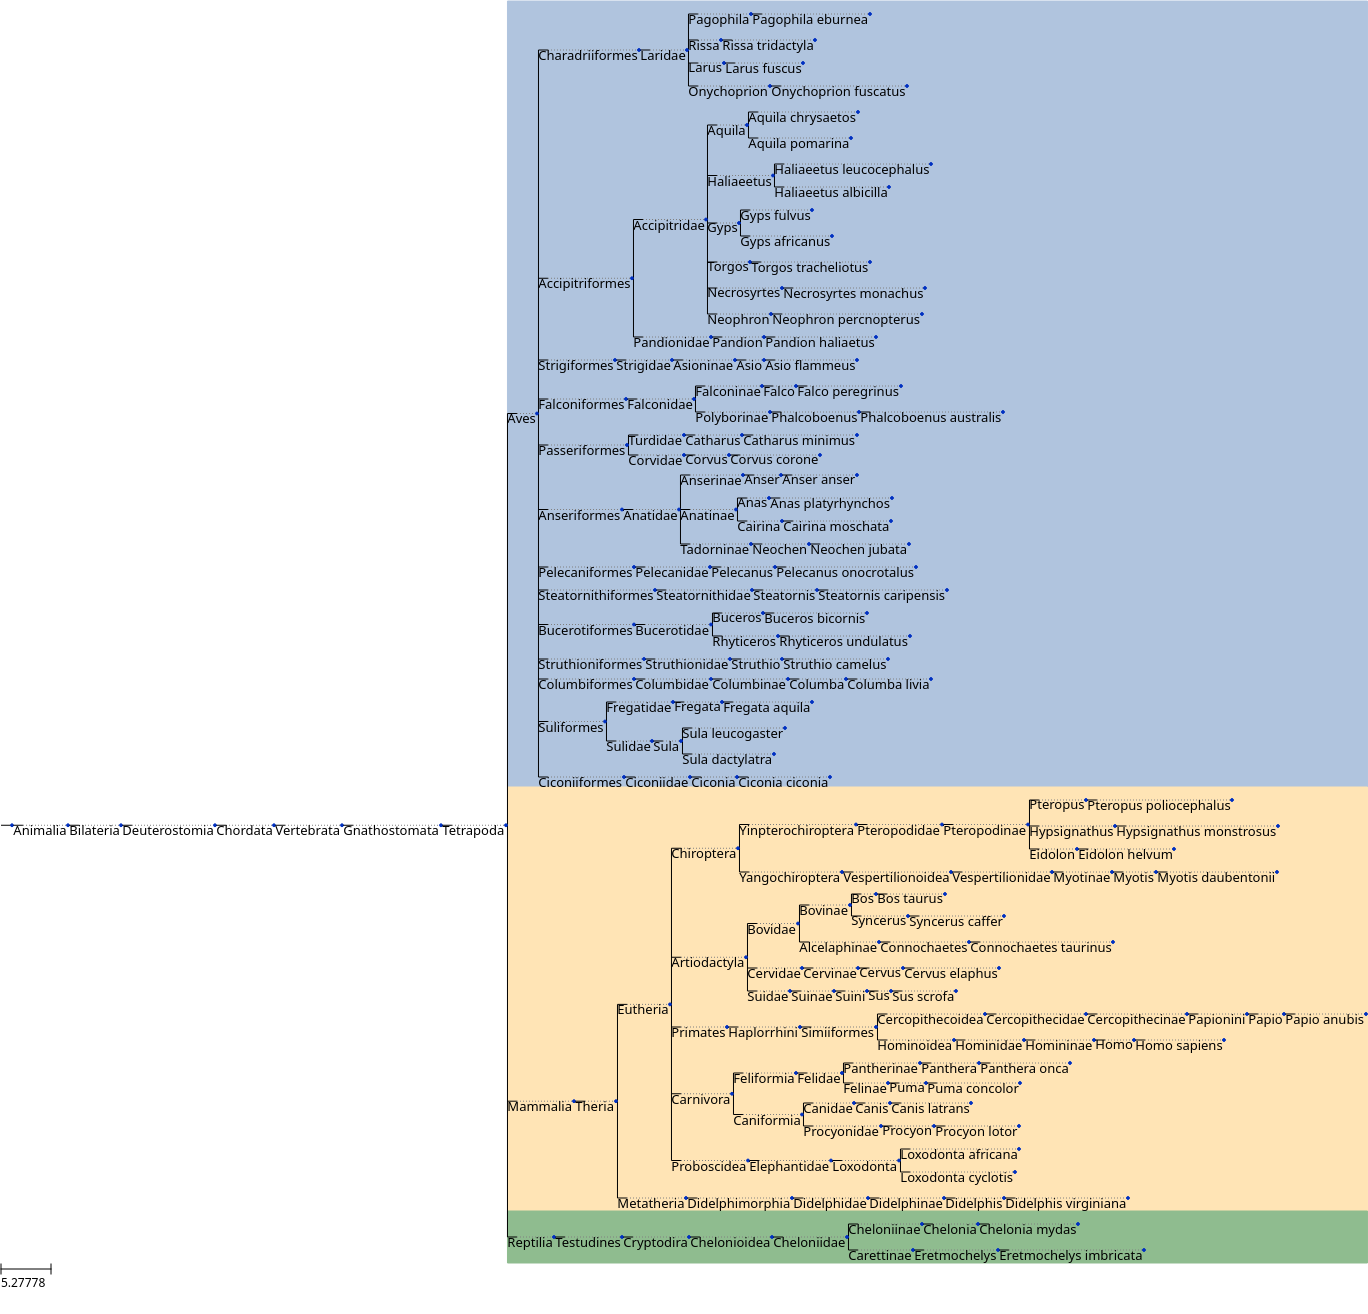

In [8]:
from ete3 import Tree, TreeStyle, Tree, TextFace, add_face_to_node, NodeStyle
t = Tree()

animals = ['Pagophila eburnea', 'Pteropus poliocephalus',
        'Aquila chrysaetos', 'Haliaeetus leucocephalus', 'Asio flammeus',
        'Pandion haliaetus', 'Falco peregrinus', 'Bos taurus',
        'Hypsignathus monstrosus', 'Papio anubis', 'Cervus elaphus',
        'Catharus minimus', 'Rissa tridactyla', 'Rissa', 'Anser anser',
        'Gyps fulvus', 'Gyps africanus', 'Torgos tracheliotus',
        'Eidolon helvum', 'Pelecanus onocrotalus', 'Larus fuscus',
        'Steatornis caripensis', 'Chelonia mydas',
        'Eretmochelys imbricata', 'Anas platyrhynchos', 'Cairina moschata',
        'Homo sapiens', 'Buceros bicornis', 'Rhyticeros undulatus',
        'Myotis daubentoni', 'Struthio camelus', 'Aquila pomarina',
        'Panthera onca', 'Columba livia', 'Haliaeetus albicilla',
        'Connochaetes taurinus', 'Sus scrofa', 'Fregata aquila',
        'Sula leucogaster', 'Sula dactylatra', 'Onychoprion fuscatus',
        'Phalcoboenus australis', 'Necrosyrtes monachus',
        'Neophron percnopterus', 'Syncerus caffer', 'Puma concolor',
        'Canis latrans', 'Neochen jubata', 'Procyon lotor',
        'Didelphis virginiana', 'Corvus corone', 'Ciconia ciconia',
        'Loxodonta africana', 'Loxodonta cyclotis']


def add_animal_to_tree(tree, animal_name):
    df = taxons_df[taxons_df["canonical_name"] == animal_name]

    hierarchical_string = df.loc[df.index[0], "hierarchy_string"]

    hierarchical_string_names = list(map(get_name_from_id, hierarchical_string.split("-")))
    for taxon in hierarchical_string_names:
        if taxon not in tree:
            tree.add_child(name=taxon)
        tree = tree.search_nodes(name=taxon)[0]
    return tree

for animal in animals:
    add_animal_to_tree(t, animal)

ts = TreeStyle()
ts.show_leaf_name = False
def my_layout(node):
    F = TextFace(node.name, tight_text=True)
    add_face_to_node(F, node, column=0, position="branch-bottom")
ts.layout_fn = my_layout

# color Aves
nst1 = NodeStyle()
nst1["bgcolor"] = "LightSteelBlue"
n1 = t.search_nodes(name="Aves")[0]
n1.set_style(nst1)

# color Mammalia

nst2 = NodeStyle()
nst2["bgcolor"] = "Moccasin"
n2 = t.search_nodes(name="Mammalia")[0]
n2.set_style(nst2)

# color Reptilia

nst3 = NodeStyle()
nst3["bgcolor"] = "DarkSeaGreen"
n3 = t.search_nodes(name="Reptilia")[0]
n3.set_style(nst3)

ts.arc_start = 180 # 0 degrees = 3 o'clock
ts.arc_span = 180
t.render("%%inline", tree_style=ts, dpi=300)